<a href="https://colab.research.google.com/github/arthursuc/MetodosComputacionales1012/blob/main/Students/Sucerquia_1047/Actividades/Actividad04_Raices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#@title Librerias
import numpy as np
import math
import matplotlib.pyplot as plt

# Actividad 04: Raices y ecuaciones de una variable

---
### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales 2025-1
---

# 1

El método de **Regula Falsi** es una modificación al método de Bisección. Con base en los siguientes pasos, escriba una función que calcule la raiz de una función. Pruebe con $x^2 - 4 = 0$, y examine la convergencia en función de la tolerancia.


### Pasos

1. **Inicialización**:
   - Se parte de un intervalo $[a, b]$ donde $f(a)$ y $f(b)$ tienen signos opuestos.
   - Esto garantiza que hay al menos una raíz en el intervalo (por el teorema del valor intermedio).

2. **Cálculo del punto de intersección**:
   - En lugar de tomar el punto medio como en la bisección, se calcula un punto c usando la siguiente fórmula:
     
     $$c = \frac{a \cdot f(b) - b \cdot f(a)}{f(b) - f(a)}$$

   - Esta fórmula representa la intersección de la línea que conecta los puntos $(a, f(a))$ y $(b, f(b))$ con el eje $x$.

3. **Evaluación y actualización del intervalo**:
   - Se evalúa $f(c)$.
   - Si $f(c) = 0$ (o es menor que una tolerancia establecida), $c$ es la raíz buscada.
   - Si $f(c)$ tiene el mismo signo que $f(a)$, se actualiza $a = c$.
   - Si $f(c)$ tiene el mismo signo que $f(b)$, se actualiza $b = c$.

4. **Iteración**:
   - Se repiten los pasos 2 y 3 hasta que se cumpla un criterio de parada (por ejemplo, $|f(c)| < tolerancia$ o se alcance un número máximo de iteraciones).

In [249]:
#no hay mucho qué explicar, simplemente hice las modificaciones a la biseccion
def regula(f,a,b,tol=1e-8,iteraciones=10000):
  if f(a)*f(b) >=0:
    raise ValueError("La funcion debe cambiar de signo en el intervalo")
  else:
      i = 0
      while i < iteraciones:
       c = (a*f(b)-b*f(a))/(f(b)-f(a))
       if f(c) == 0 or abs(f(c)) < tol:
          break
       if f(a)*f(c) > 0:
         a = c
       else:
        b=c
       i += 1
       if i >= iteraciones:
        raise ValueError(f"No converge a la tolerancia deseada con {iteraciones} iteraciones")
  return c,i

In [250]:
#aqui evalúo para asegurarme, y efectivamente fue lo deseado
f = lambda x: x**2-4
regula(f,0,3)

(1.9999999993446398, 13)

# 2

Una carga total $Q$ se distribuye uniformemente alrededor de un conductor en forma de anillo de radio $a$. Una carga $q$ se encuentra a una distancia $x$ horizontalmente a través del centro del anillo. La fuerza ejercida sobre la carga por el anillo está dada por:

$$F = \frac{1}{4\piϵ_0}\frac{qQx}{(x^2+a^2)^{3/2}}$$

con $q$ y $Q$ de $2\times 10^{-5}$C.

  * Escriba una función donde ingresen los valores de $a$ y $x$ para hallar la fuerza.
  * Haga un gráfico de $F(x)$ para un anillo de radio $a= 0.85$m para $0.1\leq x\leq 2.0$m
  * Usando el método de Newton-Raphson y otro diferente, para encontrar el valor de $x$ en el cual la fuerza será equivalente a 1.25 N.
  * Encuentre qué sucede si disminuimos el radio con respecto a la fuerza que experimentará la carga $q$.

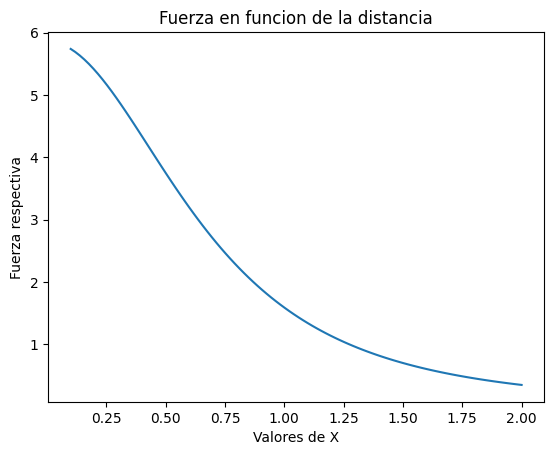

In [32]:
#funcion simple para hallar la fuerza puntual
def fuerza(a,x):
  q = 2e-5
  Q = 2e-5
  epsilon_0 = 8.85e-12
  return 1/(4*np.pi*epsilon_0)*(q*Q)/(x**2+a**2)**(3/2)
#Setup de la grafica
intervalo= np.linspace(0.1,2.0,100)
a = 0.85
F = fuerza(a,intervalo)
plt.plot(intervalo,F)
plt.title("Fuerza en funcion de la distancia")
plt.xlabel("Valores de X")
plt.ylabel("Fuerza respectiva")
plt.show()

In [227]:
#nada nuevo, simplemente el metodo de newton
def newton(f,df,x0,tol=1e-8,iteraciones=1000):
  if df(x0)==0:
    raise ValueError("La derivada no puede ser cero")
  else:
    i=0
    while i < iteraciones:
      x1 = x0 - (f(x0)/df(x0))
      if abs(x1-x0) < tol:
        break
      x0 = x1
      i += 1
      if i >= iteraciones:
        raise ValueError(f"No converge a la tolerancia deseada con {iteraciones} iteraciones")
    return x0,i

In [241]:
#metodo secante
def secante(f,x0,x1,tol=1e-8,iteraciones=10000):
  i = 0
  for k in range(iteraciones):
    i += 1
    x2 = x1 - (f(x1)*(x1-x0))/(f(x1)-f(x0))
    if abs(x2-x1) < tol:
      break
    x0 = x1
    x1 = x2
    if i >= iteraciones:
      raise ValueError(f"No converge a la tolerancia deseada con {iteraciones} iteraciones")
  return x2,i
#metodo biseccion
def biseccion(f,a,b,tol=1e-12,iteraciones=10000):
  if f(a)*f(b) >=0:
    raise ValueError("La funcion debe cambiar de signo en el intervalo")
  else:
      i = 0
      while i < iteraciones:
       c = (a+b)/2
       if f(c) == 0 or abs(f(c)) < tol:
          break
       if f(a)*f(c) < 0:
         b = c
       else:
        a=c
       i += 1
       if i >= iteraciones:
        raise ValueError(f"No converge a la tolerancia deseada con {iteraciones} iteraciones")
  return c,i

In [242]:
#aqui declare las variables para mas comodidad
epsilon_0 = 8.85e-12
q = 2e-5
Q = 2e-5
a = 0.85
#funcion "igualada a cero" para buscar la raiz planteada (es decir, en qué x la función da 1.25)
f= lambda x: 1/(4*np.pi*epsilon_0)*(q*Q)/(x**2+a**2)**(3/2) - 1.25
#derivada, tener en cuenta que la hice aparte. Quiero decir, utilizar la definicion numérica acababa con mis iteraciones sin converger
df = lambda x: (q*Q/(4*np.pi*epsilon_0))*(a**2-2*x**2)/((x**2+a**2)**(5/2))

x_raiz,iteraciones = newton(f,df,1)
#evaluar
print(f"un X aproximado que satisface la ecuacion es {x_raiz}, puesto que al evaluarlo, obtenemos {fuerza(a,x_raiz)} con el metodo newton")



un X aproximado que satisface la ecuacion es 1.1403987843441132, puesto que al evaluarlo, obtenemos 1.2499999901093286 con el metodo newton


In [243]:
raiz_sec, iter_sec =secante(f,1,2)
#evaluar
print(f"un X aproximado que satisface la ecuacion es {raiz_sec}, puesto que al evaluarlo, obtenemos {fuerza(a,raiz_sec)} con el metodo secante")

un X aproximado que satisface la ecuacion es 1.1403987796653008, puesto que al evaluarlo, obtenemos 1.2500000000000002 con el metodo secante


# 3

La velocidad ascendente $v$ de un cohete se puede calcular mediante
$$v = u\ln \frac{m_0}{m_0 - qt} - gt$$

donde $u$ es la velocidad a la que se expulsa el combustible, $m_0$ la masa inicial del cohete en $t = 0$, $q$ la razón de consumo del combustible y $g = 9.81$ m/s$^2$.

* Escriba una función para $v$ con las variables asociadas.
* Sea $m_0 = 1.6\times 10^5$ kg, $u = 1800$ m/s y $q = 2600$ kg/s realice un grafico de $v(t)$ para $0\leq t\leq 100$ s.
* Encuentre el valor de tiempo para el cual $v = 750$ m/s usando el método de Newton-Raphson, Bisección y el de Regula-Falsi
* Varie los valores de $u$ (utilice por lo menos 20) y encuentre los tiempos para los cuales el cohete alcanzará la velocidad de 750 m/s. Qué conclusiones puede sacar?



In [244]:
#funcion de velocidad puntual
def velocidad(u,m0,q,t):
  g = 9.81
  return u*np.log(m0/(m0-q*t))-g*t


<ipython-input-244-4014290069>:3: RuntimeWarning: invalid value encountered in log
  return u*np.log(m0/(m0-q*t))-g*t


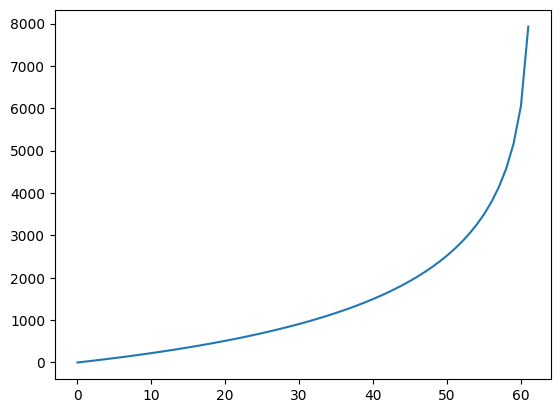

podemos ver que 26.407847956622824 es el valor buscado, porque al evaluar da 750.0000000271676 con metodo newton
podemos ver que 26.407847955967036 es el valor buscado, porque al evaluar da 749.9999999999998 con metodo biseccion
podemos ver que 26.40784795581904 es el valor buscado, porque al evaluar da 749.9999999938689 con metodo regula


In [248]:
#set up del grafico
velocidades = np.array([])
for i in range(0,100):
  velocidades = np.append(velocidades, velocidad(1800,160000,2600,i))

plt.plot(velocidades)
plt.show()

#nota importante
"""Tengase en cuenta que el cohete en un cierto momento se queda sin combustible,
por eso no llega hasta los 100 segundos la grafica. Analíticamente, es cuando
el ln(x) comienza a tener x no positivos"""

#declaro las variables otra vez aqui porque tengo déficit de atención KJakjsjkJKKA
u,m0,q=1800,160000,2600
#setup de la funcion "igualada a cero"--otra vez hice la derivada aparte
f_cohete = lambda x: velocidad(1800,160000,2600,x) - 750
df_cohete = lambda x: u*q/(m0-q*x) - 9.81


#evaluar
x_newton, newt_iteraciones = newton(f_cohete,df_cohete,50)
print(f"podemos ver que {x_newton} es el valor buscado, porque al evaluar da {velocidad(1800,160000,2600,x_newton)} con metodo newton")

x_biseccion,bisec_iteraciones = biseccion(f_cohete,5,50)
print(f"podemos ver que {x_biseccion} es el valor buscado, porque al evaluar da {velocidad(1800,160000,2600,x_biseccion)} con metodo biseccion")

x_regula,regula_iteraciones = regula(f_cohete,5,50)
print(f"podemos ver que {x_regula} es el valor buscado, porque al evaluar da {velocidad(1800,160000,2600,x_regula)} con metodo regula")


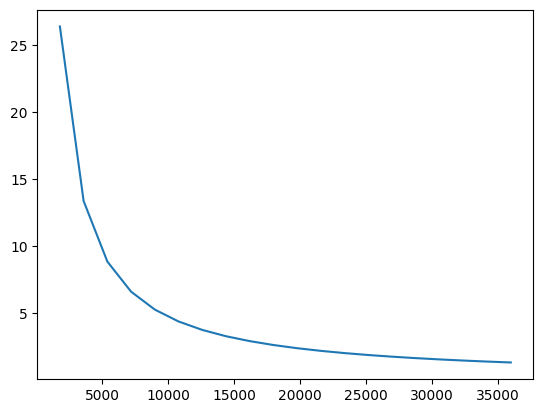

In [251]:
#no, pues, un for para razonar el último punto

us = np.array([])
tiempos = np.array([])
for i in range(1,21):
  funcion_cohete = lambda x: velocidad(1800*i,160000,2600,x) - 750
  derivada_cohete = lambda x: 1800*i*q/(m0-q*x) - 9.81
  x_newton, newt_iteraciones = newton(funcion_cohete,derivada_cohete,50)
  us = np.append(us,1800*i)
  tiempos = np.append(tiempos,x_newton)
plt.plot(us,tiempos)
plt.show()
"""se puede ver que, la velocidad a la cual se expulsa combustible (u),
es inversamente proporcional al tiempo requerido para alcanzar la velocidad deseada,
es decir, llegará más rápido"""

#en el nombre del padre, del hijo, y del espíritu santo